In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=1.5)

In [48]:
def load_df_from_datasets(location_prefix, number):
    target_file = "{}_{}.csv".format(location_prefix, number)
    df = pd.read_csv(target_file)
    df = df.rename(columns={'Unnamed: 0':'time'})
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.tz_localize(None)
    df = df.set_index('time')
    df["LogPower"] = np.log(df["Power"] + 2)
    
    return df
  
basic_df = load_df_from_datasets("../data/raw/synthetic_basic/Synthetic_Basic", 1)    
soil_df  = load_df_from_datasets("../data/raw/synthetic_soil/Synthetic_Soil", 1)
soil_weather_df = load_df_from_datasets("../data/raw/synthetic_soil_weather/Synthetic_Soil_and_Weather", 1)



In [49]:
soil_D = soil_df.resample("D").m
soil_Y_roll = soil_df.rolling("365D").mean()

basic_D = basic_df.resample("D").mean()
basic_Y_roll = basic_df.rolling("365D").mean()

basic_D = basic_df.resample("D").mean()
basic_Y_roll = basic_df.rolling("365D").mean()

/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/IPython/core/pylabtools.py:131: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


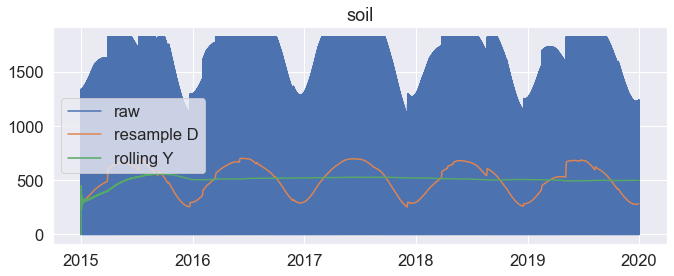

In [26]:
fig, ax = plt.subplots()
ax.plot(soil_df["Power"], label='raw')
ax.plot(soil_D["Power"], label='resample D')
ax.plot(soil_Y_roll["Power"], label="rolling Y")
ax.set_title("soil")
ax.legend()

/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/IPython/core/pylabtools.py:131: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


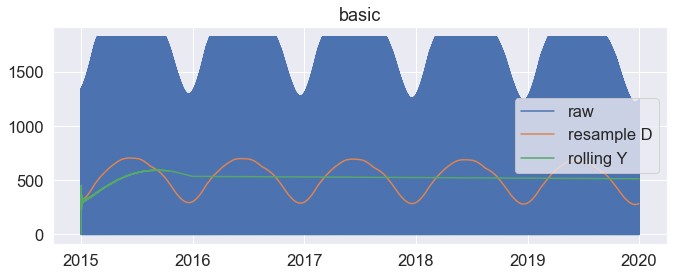

In [27]:
fig, ax = plt.subplots()
ax.plot(basic_df["Power"], label='raw')
ax.plot(basic_D["Power"], label='resample D')
ax.plot(basic_Y_roll["Power"], label="rolling Y")
ax.set_title("basic")
ax.legend()

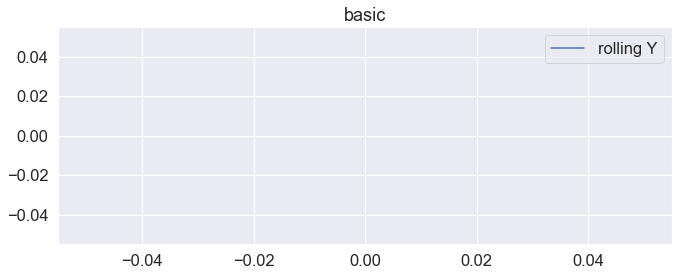

In [54]:
fig, ax = plt.subplots()
ax.plot(basic_D["LogPower"].values[60*24*365:], label="rolling Y")
ax.set_title("basic")
ax.legend()

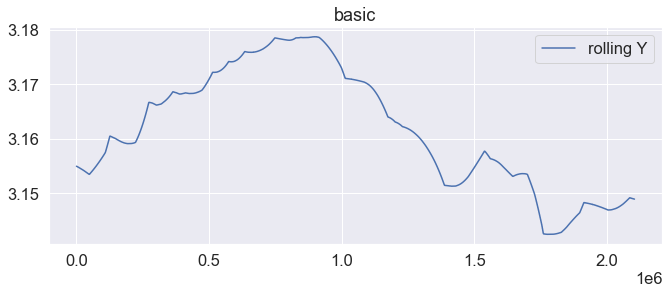

In [52]:
fig, ax = plt.subplots()
ax.plot(soil_Y_roll["LogPower"].values[60*24*365:], label="rolling Y")
ax.set_title("basic")
ax.legend()

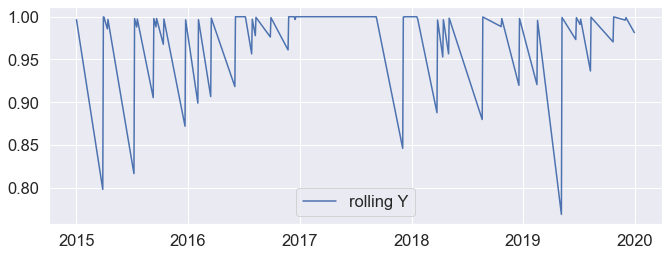

In [56]:
fig, ax = plt.subplots()
ax.plot(soil_D["soiling"], label="rolling Y")
ax.legend()

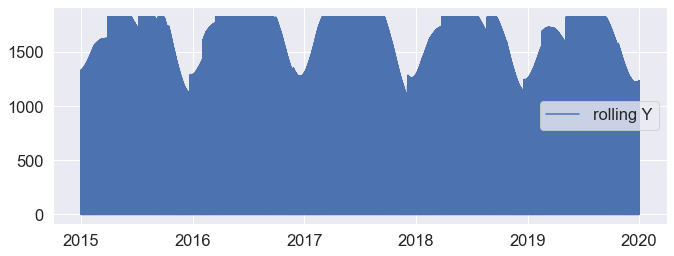

In [71]:
soil_D_max = soil_df.resample("H").mean()
fig, ax = plt.subplots()
ax.plot(soil_D_max["Power"], label="rolling Y")
ax.legend()




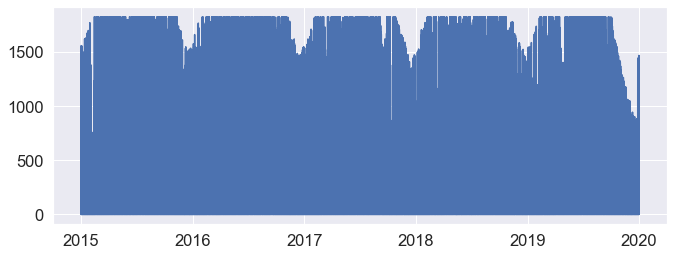

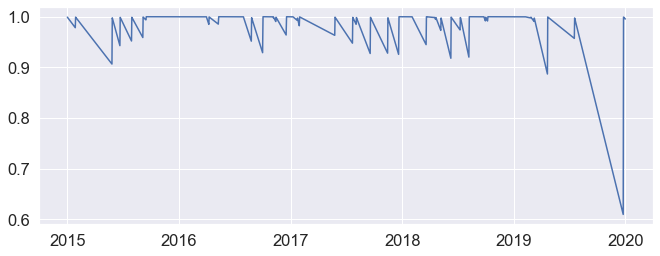

In [78]:
soil_weather_D = soil_weather_df.resample("H").mean()
fig, ax = plt.subplots()
ax.plot(soil_weather_D["Power"], label="rolling Y")
fig, ax = plt.subplots()
ax.plot(soil_weather_D["soiling"], label="rolling Y")


In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
results = seasonal_decompose(basis_df["Power"].resample("H").mean(), model="additive")

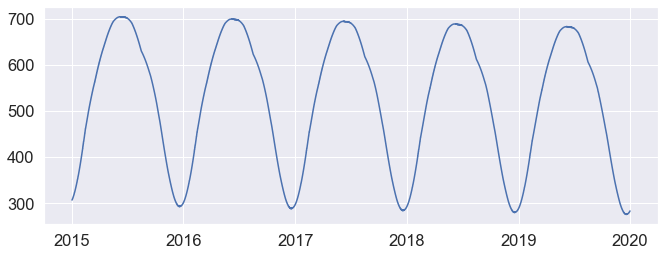

In [84]:
plt.plot(results.trend)


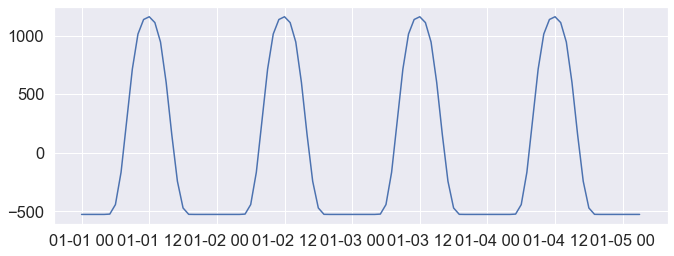

In [86]:
plt.plot(results.seasonal[:100])

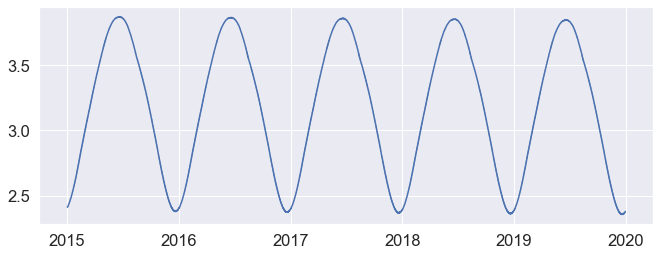

In [90]:
results = seasonal_decompose(basic_df["LogPower"].resample("H").mean(), model="additive")
plt.plot(results.trend)

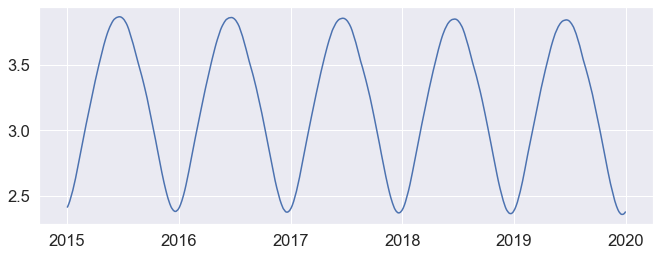

In [96]:
results2 = seasonal_decompose(results.trend[12:-12], model="additive")
plt.plot(results2.trend)

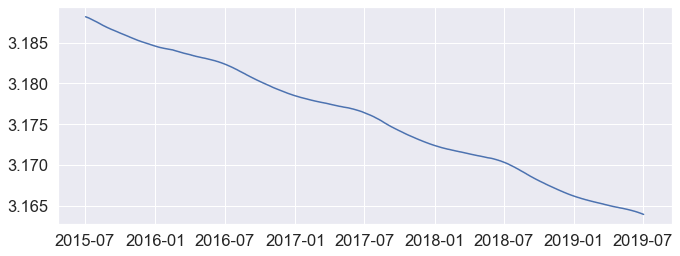

In [153]:
data = basic_df["LogPower"].resample("H").mean()
daily_seasonality = seasonal_decompose(data, model="additive", period=24)
data_d = data - daily_seasonality.seasonal
no_season = seasonal_decompose(data_d, model="additive", period=24*365)
plt.plot(no_season.trend)

In [129]:
from scipy import stats

In [154]:

y = no_season.trend.dropna()
x = np.arange(y.size)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

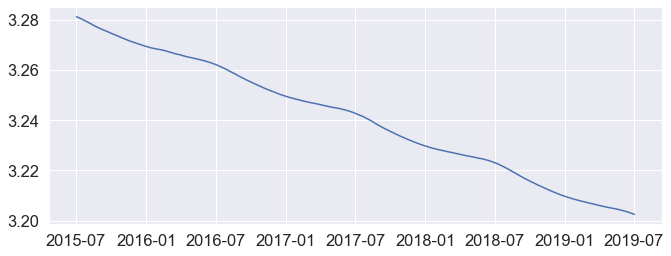

In [158]:
plt.plot(np.exp(y-2))

In [136]:
x

array([    0,     1,     2, ..., 43821, 43822, 43823])

In [160]:
(3.28-3.26)/3.28

0.0060975609756097615

In [161]:
basic_df

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling,LogPower
time,,,,,,,
2015-01-01 00:00:00,-1.0,0.0,5.1,0.0,-0.01436,1,0.0
2015-01-01 00:01:00,-1.0,0.0,5.1,0.0,-0.01436,1,0.0
2015-01-01 00:02:00,-1.0,0.0,5.1,0.0,-0.01436,1,0.0
2015-01-01 00:03:00,-1.0,0.0,5.1,0.0,-0.01436,1,0.0
2015-01-01 00:04:00,-1.0,0.0,5.1,0.0,-0.01436,1,0.0
...,...,...,...,...,...,...,...
2019-12-31 23:55:00,-1.0,0.0,5.2,0.0,-0.01436,1,0.0
2019-12-31 23:56:00,-1.0,0.0,5.2,0.0,-0.01436,1,0.0
2019-12-31 23:57:00,-1.0,0.0,5.2,0.0,-0.01436,1,0.0
